# 618 Project - Cosmetics Product Analysis

**Team Members**: 
- Ruizhe Wang
- Zhiyi Ji (Unique Name: jizhiyi)

## Overview

For our project, we will use the **Sephora Products and Skincare Reviews Dataset**, which contains detailed information on over 8,000 beauty products and 1 million user reviews. This dataset offers insights into the skincare industry by providing product details, prices, ingredients, and customer feedback.  

Our goal is to analyze **what drives higher customer ratings** for skincare products by exploring whether factors like **ingredients** (e.g., organic or chemical-free) or **brand reputation** influence satisfaction. We’ll also assess if **higher-priced products** tend to receive better reviews.

Beyond ratings, we’ll explore **trends in user sentiment across skincare brands over time**, looking for shifts in perception and the rise of trends like **"clean beauty."** Additionally, we’ll check for **seasonal variations** in feedback (e.g., more negative reviews in winter).

Finally, we’ll identify **which ingredients are linked to positive or negative experiences**, uncovering patterns in customer preferences or identifying common sources of dissatisfaction, such as allergic reactions.

Through **data manipulation, sentiment analysis, and visualization**, we aim to generate meaningful insights into the factors that influence customer satisfaction and help businesses align their product strategies with consumer preferences.

## Motivation

The beauty and skincare industry has experienced rapid growth, with consumers increasingly seeking products tailored to their specific needs and preferences. Customer reviews play a crucial role in shaping brand reputations and influencing purchasing decisions. By analyzing the Sephora Products and Skincare Reviews Dataset, we aim to uncover what drives **customer satisfaction** by analyzing how factors like **ingredients, pricing, and brand reputation** affect product reviews.

We are motivated by the rising demand for **"clean beauty"** and shifts in consumer sentiment toward sustainable products. Understanding these trends and **seasonal variations** in reviews can help brands better meet customer expectations and improve their offerings.

Our findings will provide actionable insights, helping companies align their products with customer preferences, avoid allergenic ingredients, and **enhance customer experiences** through data-driven strategies.

## Data Sources

**Source:**
- [Kaggle: Sephora Products and Skincare Reviews Dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data)

This dataset was collected in March 2023 and provides detailed information on a variety of beauty and skincare products available on Sephora's online store. It includes both product details and customer reviews, offering a comprehensive view of customer feedback and product features. The dataset is publicly available on Kaggle, a popular data platform, making it suitable for exploratory analysis and machine learning tasks.

## Data Description


The dataset contains two primary components:  
1. **Product Information**  
   - **8,000+ products** from various brands, covering attributes such as:
     - Product name and brand  
     - Price
     - Ingredients and product type (e.g., moisturizer, serum)  
     - Product features, such as whether it is organic, vegan, or chemical-free  

2. **Customer Reviews**  
   - **1 million+ reviews** from users across over 2,000 skincare products, including:
     - **Ratings:** Numerical scores indicating customer satisfaction  
     - **Review text:** User opinions and feedback  
     - **Review metadata:** User appearance features (e.g., skin type) and other users' ratings on the helpfulness of reviews  

The data provides opportunities to explore product pricing trends, ingredient preferences, and customer satisfaction metrics. However, it may contain **missing or noisy values**, particularly in review text and product features, requiring cleaning and preprocessing. 

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### Product Information

In [308]:
product_df = pd.read_csv("Sephora/product_info.csv")

In [309]:
print("product info dataframe shape: ", product_df.shape)
product_df.head()

product info dataframe shape:  (8494, 27)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [310]:
print("Basic Information:")
product_df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   

In [311]:
print("\nSummary Statistics (Numerical):")
product_df.describe()


Summary Statistics (Numerical):


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


### Customer Review

In [312]:
# Reference: https://www.kaggle.com/code/themeeemul/sephora-eda-and-sentiment-analysis-using-pytorch
review_df_1 = pd.read_csv("Sephora/reviews_0-250.csv",index_col = 0, dtype={'author_id':'str'})
review_df_2 = pd.read_csv("Sephora/reviews_250-500.csv",index_col = 0, dtype={'author_id':'str'})
review_df_3 = pd.read_csv("Sephora/reviews_500-750.csv",index_col = 0, dtype={'author_id':'str'})
review_df_4 = pd.read_csv("Sephora/reviews_750-1250.csv",index_col = 0, dtype={'author_id':'str'})
review_df_5 = pd.read_csv("Sephora/reviews_1250-end.csv",index_col = 0, dtype={'author_id':'str'})

# Merge review_df_1 till review_df_6
review_df = pd.concat([review_df_1, review_df_2, review_df_3, review_df_4, review_df_5],axis=0)
print("review_df shape: ",review_df.shape)

review_df shape:  (1094411, 18)


In [313]:
review_df.sample(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
132394,6466050277,4,NaN,NaN,0,0,0,2016-07-28,I bought the Active Charcoal Mask because I li...,It's okay,NaN,NaN,NaN,NaN,P297524,Clear Improvement Active Charcoal Mask to Clea...,Origins,17.0
72489,9183943600,5,1.0,NaN,0,0,0,2021-10-06,This little tube of goodness gives my under ey...,Under eye boost,light,brown,combination,brown,P475589,Ginzing Vitamin C Eye Cream to Brighten and De...,Origins,37.0
91180,5360909897,5,NaN,NaN,0,0,0,2013-12-14,I use the 3-step skin care system that Cliniqu...,3-Step skin care is necessary!!,NaN,NaN,combination,NaN,P122881,Clarifying Lotion 3,CLINIQUE,20.0
1965,32362680103,5,1.0,NaN,0,0,0,2022-12-13,"I’m so excited to find this product, love the ...",MUST HAVE,fair,hazel,combination,NaN,P475190,Rose Glow + Get It Cooling & Brightening Eye Balm,TULA Skincare,32.0
104543,2672354939,5,NaN,0.875,8,1,7,2015-10-09,This Supergoop sunscreen oil is one of the bes...,Excellent for those who hate sunscreen,NaN,NaN,combination,NaN,P454387,Glow Oil Body Sunscreen SPF 50 PA++++,Supergoop!,38.0


In [314]:
print("Basic Information:")
review_df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating                    1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color     

In [315]:
print("\nSummary Statistics (Numerical):")
review_df.describe()


Summary Statistics (Numerical):


,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


## Data Manipulation

### Explorative Data Analysis

#### Rating

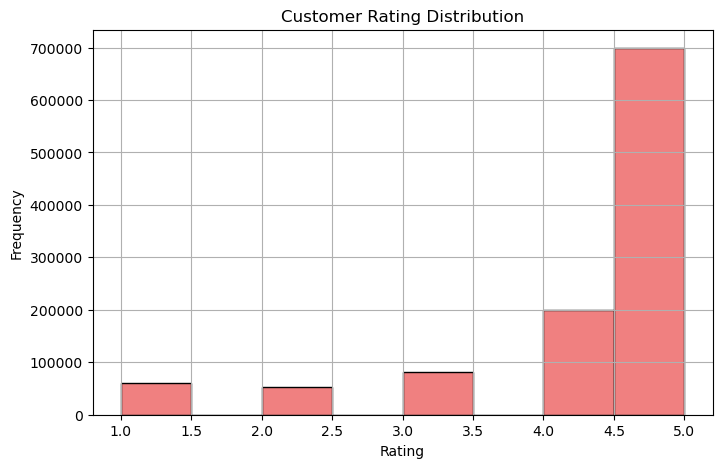

In [316]:
# Customer Rating Distribution
plt.figure(figsize=(8, 5))
review_df['rating'].hist(bins=8, color='lightcoral', edgecolor='black')
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Price

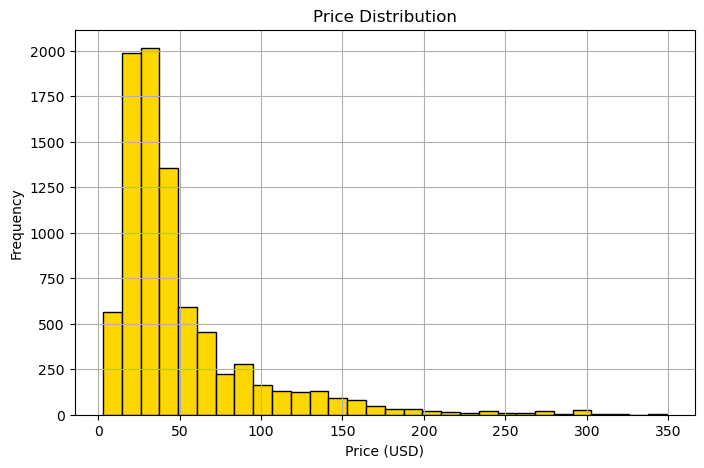

In [317]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['price_usd'] <= 350]['price_usd'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

#### Size

In [318]:
product_df['size']

0                   NaN
1        3.4 oz/ 100 mL
2        3.4 oz/ 100 mL
3        3.4 oz/ 100 mL
4        3.4 oz/ 100 mL
             ...       
8489                NaN
8490       2 oz / 60 mL
8491                NaN
8492                NaN
8493    .11 oz / 3.2 mL
Name: size, Length: 8494, dtype: object

In [319]:
product_df['size_oz'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*oz', expand=False).astype(float)
print(product_df[['size', 'size_oz']].sample(10))

                   size  size_oz
3829    0.25 oz/ 7.5 mL     0.25
325    0.17 fl oz/ 5 ml      NaN
6375             0.8 oz     0.80
568   0.1 oz   / 2.9 mL     0.10
4398      1.7 oz/ 50 mL     1.70
2032     3.3 oz/ 100 mL     3.30
6426      0.5 oz/ 15 mL     0.50
5056       1 oz / 30 mL     1.00
6053                NaN      NaN
5773      1.7 oz/ 50 mL     1.70


In [320]:
product_df['size_ml'] = product_df['size'].str.extract(r'(\d+\.?\d*)\s*mL', expand=False)
product_df['size_ml'] = product_df['size_ml'].astype(float)
print(product_df[['size', 'size_ml']].sample(10))

                       size  size_ml
5955       9.8 oz/ 289.8 mL    289.8
1507             1 oz/ 30mL     30.0
3334        0.30  oz / 9 ml      NaN
76            0.27 oz/ 8 mL      8.0
8055         0.4 mL/ 0.14 g      0.4
2947          1.0 oz/ 30 mL     30.0
6880           6 oz/ 200 mL    200.0
5101          1.7 oz/ 65 mL     65.0
6087  60 Pads-30 Treatments      NaN
7419         0.33 oz/ 10 mL     10.0


### Price Per Unit

In [321]:
product_df['price_per_oz'] = product_df['price_usd'] / product_df['size_oz']
product_df['price_per_ml'] = product_df['price_usd'] / product_df['size_ml']
product_df[['price_usd', 'size_oz', 'price_per_oz', 'size_ml', 'price_per_ml']].sample(10)

,price_usd,size_oz,price_per_oz,size_ml,price_per_ml
5199,79.0,3.30,23.939394,100.0,0.790000
2534,35.0,NaN,NaN,NaN,NaN
6899,42.0,3.30,12.727273,100.0,0.420000
5042,85.0,1.70,50.000000,50.0,1.700000
7684,25.0,0.50,50.000000,15.0,1.666667
4310,250.0,NaN,NaN,NaN,NaN
2123,75.0,1.00,75.000000,30.0,2.500000
6357,28.0,NaN,NaN,NaN,NaN
7556,32.0,0.33,96.969697,11.0,2.909091
969,133.0,3.30,40.303030,100.0,1.330000


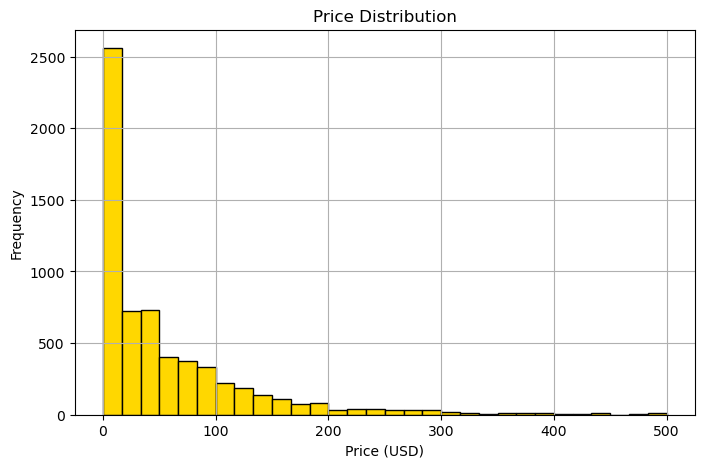

In [322]:
# Price Distribution
# To avoid outliers, we will only visualize products with price <= 350 USD
plt.figure(figsize=(8, 5))
product_df[product_df['price_per_oz'] <= 500]['price_per_oz'].hist(bins=30, color='gold', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

#### Category

In [323]:
product_df['primary_category'].value_counts()

primary_category
Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: count, dtype: int64

In [324]:
print(product_df['secondary_category'].shape)
product_df['secondary_category'].value_counts()

(8494,)


secondary_category
Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Candles & Home Scents        263
Brushes & Applicators        246
Body Moisturizers            220
Mini Size                    187
Eye Care                     186
Masks                        166
Cheek                        165
Tools                        153
Makeup                       137
Men                          135
Sunscreen                    109
Skincare                      98
Bath & Shower                 84
High Tech Tools               80
Wellness                      79
Body Care                     69
Self Tanners                  64
Lip Balms & Treatments        61
Hair                          59
Nail                    

#### Positive/Negative Feedback Percentage

In [325]:
review_df['pos_feedback_percentage'] = review_df['total_pos_feedback_count']/review_df['total_feedback_count']
review_df['neg_feedback_percentage'] = review_df['total_neg_feedback_count']/review_df['total_feedback_count']
review_df[['total_pos_feedback_count', 'total_feedback_count', 'pos_feedback_percentage', 'total_neg_feedback_count', 'neg_feedback_percentage']].sample(5)

,total_pos_feedback_count,total_feedback_count,pos_feedback_percentage,total_neg_feedback_count,neg_feedback_percentage
502786,2,4,0.500000,2,0.500000
68359,16,17,0.941176,1,0.058824
50190,0,0,NaN,0,NaN
13896,0,0,NaN,0,NaN
75131,2,4,0.500000,2,0.500000


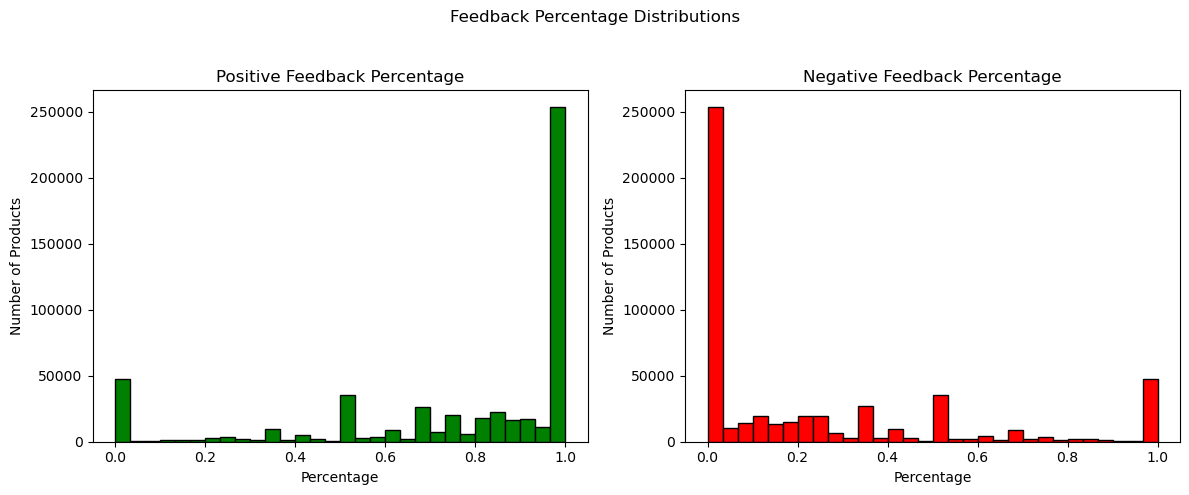

In [326]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Feedback Percentage Distributions')

axes[0].hist(review_df['pos_feedback_percentage'], bins=30, color='green', edgecolor='black')
axes[0].set_title('Positive Feedback Percentage')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Number of Products')

axes[1].hist(review_df['neg_feedback_percentage'], bins=30, color='red', edgecolor='black')
axes[1].set_title('Negative Feedback Percentage')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Number of Products')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Ingredient

In [327]:
product_df['ingredients'] = product_df['ingredients'].str.strip("[]").str.replace("'", "").str.split(", ")
all_ingredients = product_df['ingredients'].explode().dropna().tolist()
ingredient_counts = Counter(all_ingredients)
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)

In [328]:
ingredient_df.head(5)

,Ingredient,Count
191,Glycerin,4171
212,Phenoxyethanol,3862
211,Caprylyl Glycol,2747
321,Tocopherol,2681
20,Limonene,2537


In [329]:
top20_ingredients = [ingredient for ingredient, _ in ingredient_counts.most_common(20)]

# Add column in product_df for each of the top 20 ingredients for further analysis
for ingredient in top20_ingredients:
    column_name = f'contains_{ingredient}'
    product_df[column_name] = product_df['ingredients'].apply(lambda x: ingredient in x if isinstance(x, list) else False)

In [330]:
columns_to_display = ['product_id'] + [f'contains_{ingredient}' for ingredient in top20_ingredients]
product_df[columns_to_display].head()

,product_id,contains_Glycerin,contains_Phenoxyethanol,contains_Caprylyl Glycol,contains_Tocopherol,contains_Limonene,contains_Ethylhexylglycerin,contains_Dimethicone,contains_Linalool,contains_Silica,...,contains_Citric Acid,contains_Mica,contains_Potassium Sorbate,contains_Water,contains_Caprylic/Capric Triglyceride,contains_Sodium Benzoate,contains_Citronellol,contains_Tocopheryl Acetate,contains_Propanediol,contains_Geraniol
0,P473671,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,P473668,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,P473662,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,P473660,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,P473658,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


<Figure size 1200x600 with 0 Axes>

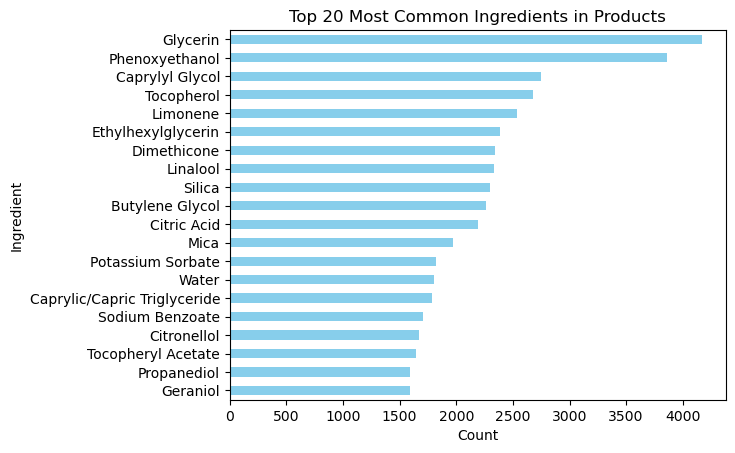

In [331]:
plt.figure(figsize=(12, 6))
ingredient_df.head(20).plot(kind='barh', x='Ingredient', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Most Common Ingredients in Products')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.gca().invert_yaxis()
plt.show()

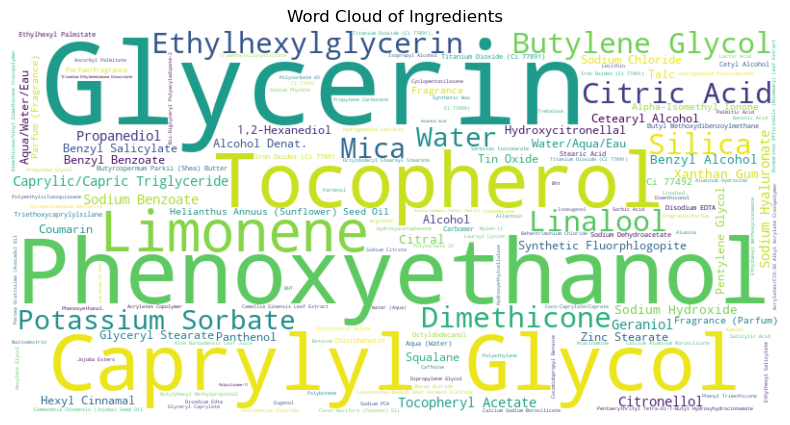

In [332]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ingredient_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.show()

### Merge Two Datasets

In [333]:
# Reference: https://www.kaggle.com/code/themeeemul/sephora-eda-and-sentiment-analysis-using-pytorch
# Merge product_df and review_df
cols_to_use = product_df.columns.difference(review_df.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')

Sephora_df = pd.merge(review_df, product_df[cols_to_use], how='outer', on=['product_id', 'product_id'])
print("Sephora Shape: ", Sephora_df.shape)

Sephora Shape:  (1100554, 66)


In [334]:
Sephora_df.sample(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,secondary_category,sephora_exclusive,size,size_ml,size_oz,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
121883,22891940247,5.0,1.0,NaN,0.0,0.0,0.0,2019-06-20,I’ve really enjoyed this cleanser. Bought a sa...,NaN,...,Cleansers,0,5 oz/ 150 mL,150.0,5.00,Face Wash & Cleansers,NaN,NaN,Size,5 oz/ 150 mL
1049402,7319025710,5.0,1.0,NaN,0.0,0.0,0.0,2022-09-25,I was surprised but I guess I shouldn’t with L...,Love it,...,Moisturizers,0,1.7 oz / 50 mL,50.0,1.70,Night Creams,NaN,NaN,Size,1.7 oz / 50 mL
580949,20217844046,5.0,1.0,NaN,0.0,0.0,0.0,2019-05-24,Lathers up REALLY nice! And the smell is a Won...,Lemon!,...,Cleansers,0,5.41 oz/ 160 mL,160.0,5.41,Face Wash & Cleansers,NaN,NaN,Size,5.41 oz/ 160 mL
798971,1770577934,4.0,1.0,0.0,1.0,1.0,0.0,2021-02-11,Ole Henriksen is my favourite skincare brand. ...,Smells delicious,...,Cleansers,1,3.0 oz/ 90g,NaN,3.00,Exfoliators,NaN,NaN,Size,3.0 oz/ 90g
1005040,2693539602,5.0,1.0,NaN,0.0,0.0,0.0,2022-05-29,Sunscreen is very important to me. I usually e...,NaN,...,Sunscreen,0,1.8 oz/ 50 mL,50.0,1.80,Face Sunscreen,NaN,NaN,Size,1.8 oz/ 50 mL


In [335]:
Sephora_df.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,pos_feedback_percentage,neg_feedback_percentage,brand_id,...,online_only,out_of_stock,price_per_ml,price_per_oz,reviews,sale_price_usd,sephora_exclusive,size_ml,size_oz,value_price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,532819.000000,532819.000000,1.100554e+06,...,1.100554e+06,1.100554e+06,854407.000000,992297.000000,1.100276e+06,9978.000000,1.100554e+06,854407.000000,992297.000000,31189.000000
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01,0.767782,0.232218,5.547432e+03,...,1.106088e-01,3.182942e-02,1.345774,40.577942,2.151789e+03,16.888082,3.239396e-01,67.240317,3.073330,114.830038
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01,0.317164,0.317164,1.493821e+03,...,3.136473e-01,1.755458e-01,1.571010,141.789132,2.524573e+03,13.961803,4.679775e-01,55.643145,7.784536,62.313042
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000,0.000000,1.063000e+03,...,0.000000e+00,0.000000e+00,0.020833,0.130682,1.000000e+00,1.750000,0.000000e+00,0.160000,0.000200,0.000000
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.652174,0.000000,5.626000e+03,...,0.000000e+00,0.000000e+00,0.333333,9.990000,5.390000e+02,7.000000,0.000000e+00,30.000000,1.000000,68.000000
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,0.928571,0.071429,6.073000e+03,...,0.000000e+00,0.000000e+00,0.950000,26.470588,1.337000e+03,18.000000,0.000000e+00,50.000000,1.700000,102.000000
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01,1.000000,0.347826,6.234000e+03,...,0.000000e+00,0.000000e+00,1.866667,50.000000,2.891000e+03,20.000000,1.000000e+00,95.000000,3.380000,142.000000
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03,1.000000,1.000000,8.020000e+03,...,1.000000e+00,1.000000e+00,131.250000,110000.000000,2.128100e+04,320.000000,1.000000e+00,1000.000000,176.000000,617.000000


## Data Cleaning

In [336]:
# 1. Check for missing values
print("Missing values per column:")
print(Sephora_df.isnull().sum())

Missing values per column:
author_id                  6143
rating                     6143
is_recommended           174131
helpfulness              567735
total_feedback_count       6143
                         ...   
tertiary_category        161894
value_price_usd         1069365
variation_desc          1091034
variation_type            52560
variation_value           64644
Length: 66, dtype: int64


In [337]:
# 2. Deal with missing values

missing_counts = Sephora_df.isna().sum()
threshold = 1
columns_to_drop = missing_counts[missing_counts > threshold].index
for col in columns_to_drop:
    print(f"{col}: {missing_counts[col]} missing values")

author_id: 6143 missing values
rating: 6143 missing values
is_recommended: 174131 missing values
helpfulness: 567735 missing values
total_feedback_count: 6143 missing values
total_neg_feedback_count: 6143 missing values
total_pos_feedback_count: 6143 missing values
submission_time: 6143 missing values
review_text: 7587 missing values
review_title: 316797 missing values
skin_tone: 176682 missing values
eye_color: 215771 missing values
skin_type: 117700 missing values
hair_color: 232911 missing values
product_name: 6143 missing values
brand_name: 6143 missing values
price_usd: 6143 missing values
pos_feedback_percentage: 567735 missing values
neg_feedback_percentage: 567735 missing values
child_max_price: 644796 missing values
child_min_price: 644796 missing values
highlights: 115729 missing values
ingredients: 22843 missing values
price_per_ml: 246147 missing values
price_per_oz: 108257 missing values
reviews: 278 missing values
sale_price_usd: 1090576 missing values
secondary_category:

In [338]:
# Drop rows with no product information (NaN in column 'product_name')
Sephora_df = Sephora_df.dropna(subset=['product_name'])

In [339]:
# Identify columns with too missing values (if threshold > 50% missing)
threshold = len(Sephora_df) * 0.3
columns_to_drop = missing_counts[missing_counts > threshold].index
print("Columns with more than 30% missing values:")
for col in columns_to_drop:
    print(f"{col}: {missing_counts[col]} missing values")

Columns with more than 30% missing values:
helpfulness: 567735 missing values
pos_feedback_percentage: 567735 missing values
neg_feedback_percentage: 567735 missing values
child_max_price: 644796 missing values
child_min_price: 644796 missing values
sale_price_usd: 1090576 missing values
value_price_usd: 1069365 missing values
variation_desc: 1091034 missing values


In [349]:
import pandas as pd

# 1. Handle feedback-related columns (helpfulness, pos_feedback_percentage, neg_feedback_percentage)
# Use direct assignment to avoid chained assignment warnings
Sephora_df = Sephora_df.assign(
    helpfulness=Sephora_df['helpfulness'].fillna(0),
    pos_feedback_percentage=Sephora_df['pos_feedback_percentage'].fillna(1),
    neg_feedback_percentage=Sephora_df['neg_feedback_percentage'].fillna(0),
    is_recommended=Sephora_df['is_recommended'].fillna(1),
)


# 2. Handle sale_price_usd, value_price_usd and etc. columns
# Fill them with price_usd

Sephora_df = Sephora_df.assign(
    child_max_price=Sephora_df['child_max_price'].fillna(Sephora_df['price_usd']),
    child_min_price=Sephora_df['child_min_price'].fillna(Sephora_df['price_usd']),
    sale_price_usd=Sephora_df['sale_price_usd'].fillna(Sephora_df['price_usd']),
    value_price_usd=Sephora_df['value_price_usd'].fillna(Sephora_df['price_usd'])
)

# 4. Handle variation_desc column
# Fill missing values with 'No variation'
Sephora_df = Sephora_df.assign(
    variation_desc=Sephora_df['variation_desc'].fillna('No variation')
)

# 5. Print the result to confirm the missing values have been handled
missing_counts_after = Sephora_df.isna().sum()
print("Missing values after processing:")
print(missing_counts_after[missing_counts_after > 0])

Missing values after processing:
review_text             1444
review_title          310654
skin_tone             170539
eye_color             209628
skin_type             111557
hair_color            226768
highlights            113936
ingredients          1094411
price_per_ml          243296
price_per_oz          106754
size                   43363
size_ml               243296
size_oz               106754
tertiary_category     161256
variation_type         51455
variation_value        63433
dtype: int64


In [341]:
numerical_cols = Sephora_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = Sephora_df.select_dtypes(include=['object']).columns

In [342]:
# 3. Strip whitespace from string columns (if any)
Sephora_df[categorical_cols] = Sephora_df[categorical_cols].apply(lambda x: x.str.strip())

### Relationship between Customer Ratings and Other Factors of Product

In [343]:
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price', 'size_oz', 'size_ml',
       'price_per_oz', 'price_per_ml', 'contains_Glycerin',
       'contains_Phenoxyethanol', 'contains_Caprylyl Glycol',
       'contains_Tocopherol', 'contains_Limonene',
       'contains_Ethylhexylglycerin', 'contains_Dimethicone',
       'contains_Linalool', 'contains_Silica', 'contains_Butylene Glycol',
       'contains_Citric Acid', 'contains_Mica', 'contains_Potassium Sorbate',
       'contains_Water', 'contains_Caprylic/Capric Triglyceride',
       'contains_Sodium Benzoate', 'contains_Ci

In [344]:
correlation_features = ['rating', 'price_usd', 'price_per_oz', 'pos_feedback_percentage',
                        'is_recommended']

correlation_data = Sephora_df[correlation_features]

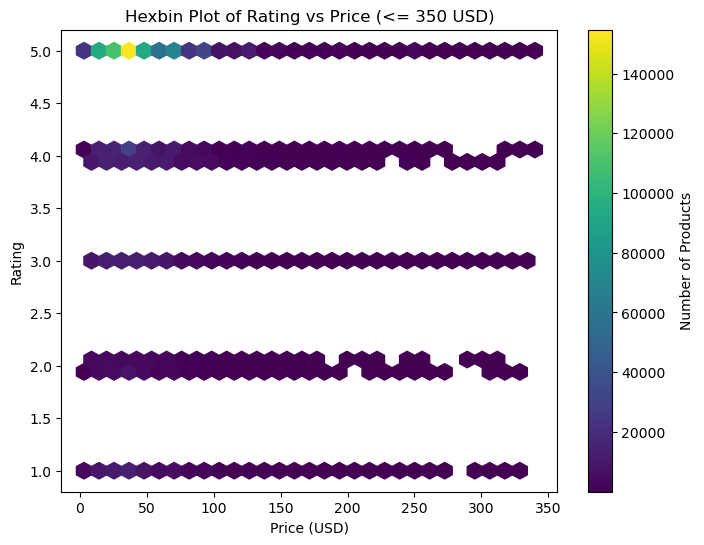

In [345]:
# Hexbin Plot (Rating vs Price)
# Filter products with price <= 350 USD
filtered_df = Sephora_df[Sephora_df['price_usd'] <= 350]

plt.figure(figsize=(8, 6))
plt.hexbin(filtered_df['price_usd'], filtered_df['rating'], gridsize=30, 
           cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Hexbin Plot of Rating vs Price (<= 350 USD)')
plt.show()

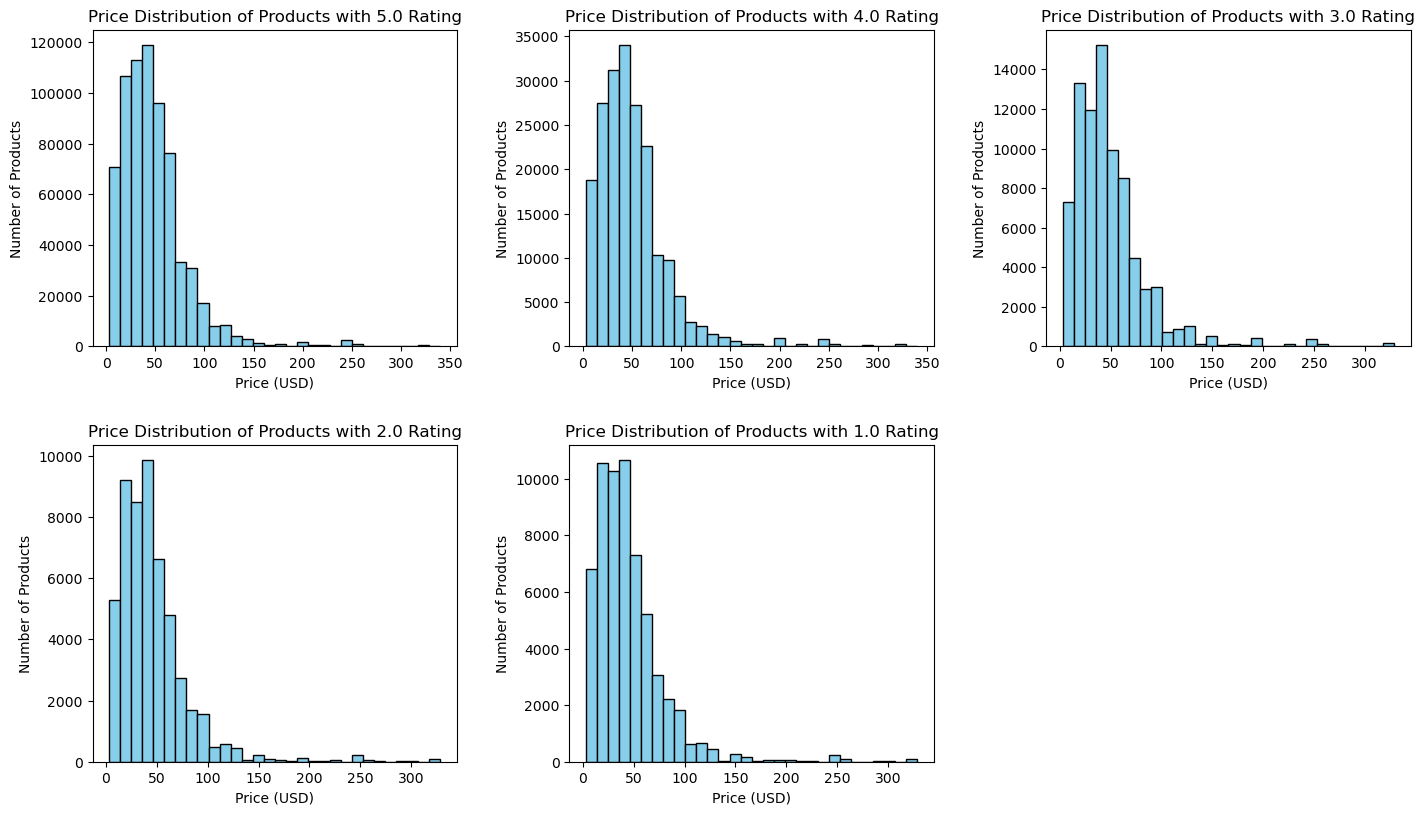

In [346]:
ratings = [5.0, 4.0, 3.0, 2.0, 1.0]
filtered_dfs = {rating: Sephora_df[(Sephora_df['rating'] == rating) & (Sephora_df['price_usd'] <= 350)] for rating in ratings}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
fig.tight_layout(pad=5.0)

for idx, rating in enumerate(ratings):
    row, col = divmod(idx, 3)
    ax = axes[row, col]
    df = filtered_dfs[rating]
    
    ax.hist(df['price_usd'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Price Distribution of Products with {rating} Rating')
    ax.set_xlabel('Price (USD)')
    ax.set_ylabel('Number of Products')

if len(ratings) < 6:
    fig.delaxes(axes[-1, -1])

plt.show()


From the figure above, we can observe that there are **differences between price distribution for different rating**. 

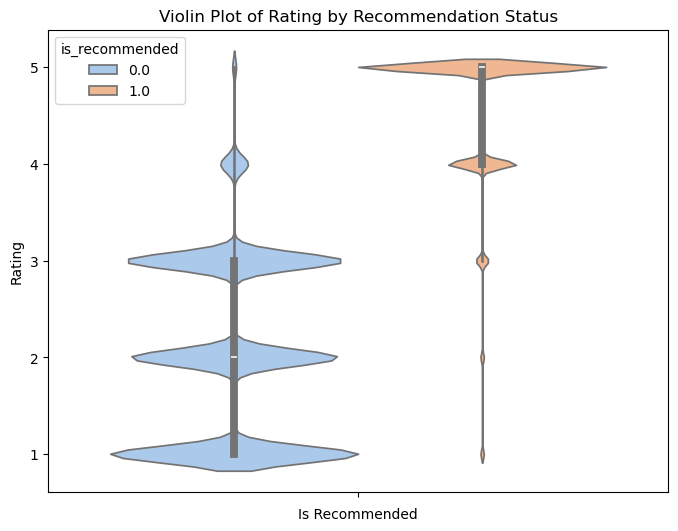

In [347]:
# Violin Plot (Rating vs is_recommended)
plt.figure(figsize=(8, 6))
sns.violinplot(data=Sephora_df, hue='is_recommended', y='rating', palette='pastel')
plt.title('Violin Plot of Rating by Recommendation Status')
plt.xlabel('Is Recommended')
plt.ylabel('Rating')
plt.show()

From the violin plot above, we can observe that there are **significant rating differences between isRecommended or not**. 

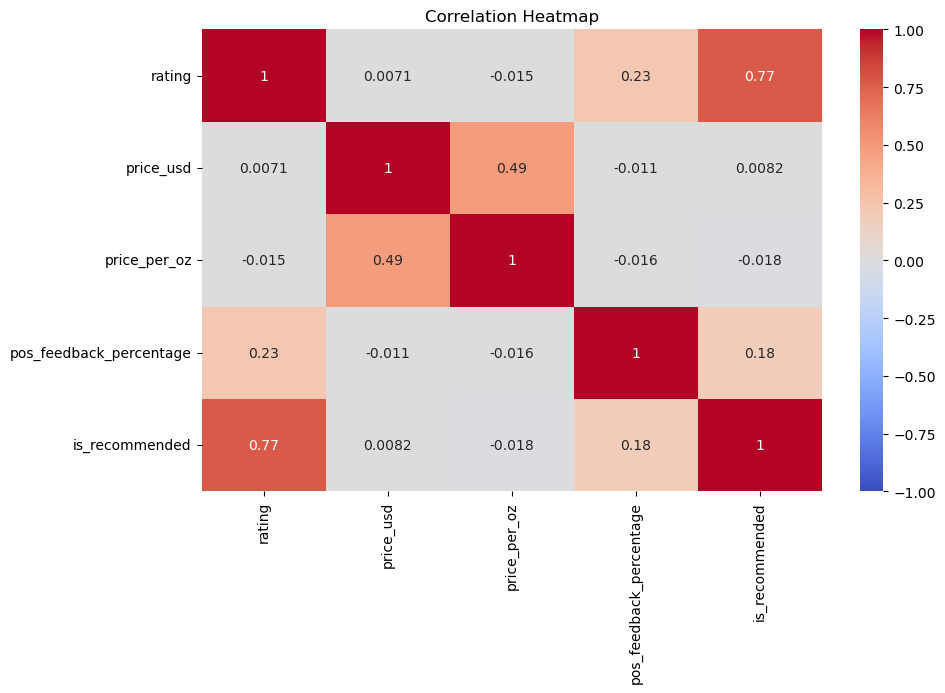

In [348]:
corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Data Visualization